# Project 2 - DATA ANALYSIS AND MACHINE LEARNING COURSE (February, 2021)

Delgado Jessica, Karagianni Christina, Ruiz Vladmir, Selemon Deborah

In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from IPython.display import display
from pylab import plt, mpl
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential     
from tensorflow.keras.layers import Dense         
from tensorflow.keras import optimizers            
from tensorflow.keras import regularizers           
from tensorflow.keras.utils import to_categorical  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as splitter
from sklearn.datasets import load_breast_cancer
import pickle
import os 

Structuring and reading the data.

,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high blood pressure,platelets,serum creatinine,serum sodium,sex,smoking,time,death event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


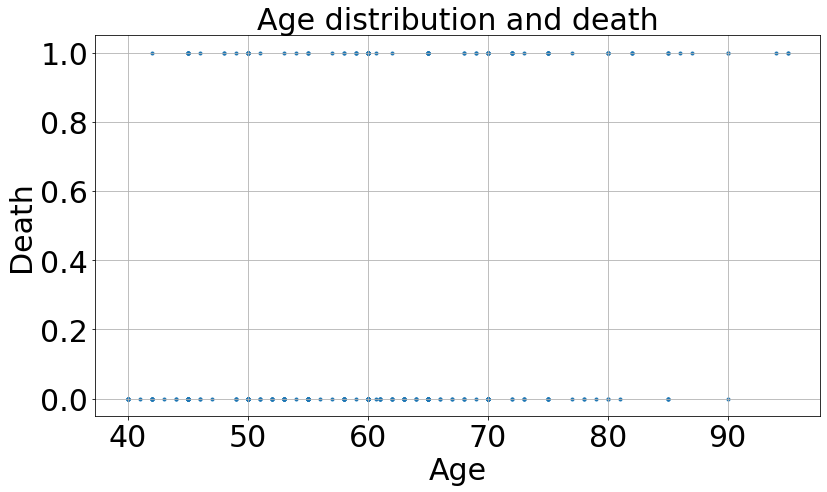

In [7]:
# Reading the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv", names=( 'age', 'anaemia',  
                                                                       'creatinine phosphokinase', 'diabetes',
                                                                       'ejection fraction', 'high blood pressure', 'platelets', 
                                                                       'serum creatinine', 'serum sodium', 'sex', 'smoking',
                                                                       'time', 'death event'))

# Defining the variables 
age = data['age'] # Age of the patient (years)
anaemia = data['anaemia'] # Decrease of red blood cells or hemoglobin (boolean)
HBP = data['high blood pressure'] # If the patient has hypertension (boolean)
CPK = data['creatinine phosphokinase'] # Level of the CPK enzyme in the blood (mcg/L)
diabetes = data['diabetes'] # If the patient has diabetes (boolean)
ejection_fraction = data['ejection fraction'] # Percentage of blood leaving the heart at each contraction (percentage)
platelets = data['platelets'] # Platelets in the blood (kiloplatelets/mL)
sex = data['sex'] # Woman or man (binary)
serum_creatinine = data['serum creatinine'] # Level of serum creatinine in the blood (mg/dL)
serum_sodium = data['serum sodium'] # Level of serum sodium in the blood (mEq/L)
smoking = data['smoking'] # If the patient smokes or not (boolean)
time = data['time'] # Follow-up period (days)
death = data['death event'] # If the patient deceased during the follow-up period (boolean)

display(data)

fig1 = plt.figure(figsize=(13,7))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.scatter(age, death, marker='.')
plt.xlabel('Age',size=30)
plt.ylabel('Death',fontsize=30)
plt.title('Age distribution and death',fontsize=30)
fig1.savefig("death-age.jpg", dpi=150)
plt.xticks(size = 30)
plt.yticks(size = 30)
axes.grid(b=True, which='major', linestyle='-')
plt.show()

# WE HAVE A BINARY OUTPUT = death 0 or 1

<AxesSubplot:xlabel='death event', ylabel='count'>

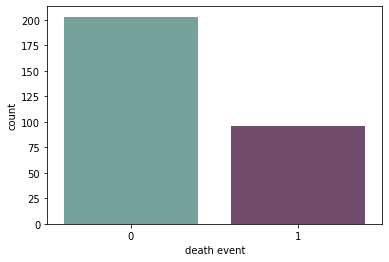

In [8]:
# Plotting a count plot of the targer attribute
# Evaluating the target and finding out if the data is balanced or not

cols= ["#6daa9f","#774571"]
sns.countplot(x= death, palette= cols)

# the data is not balanced!

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection fraction'}>,
        <AxesSubplot:title={'center':'high blood pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum creatinine'}>],
       [<AxesSubplot:title={'center':'serum sodium'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'death event'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

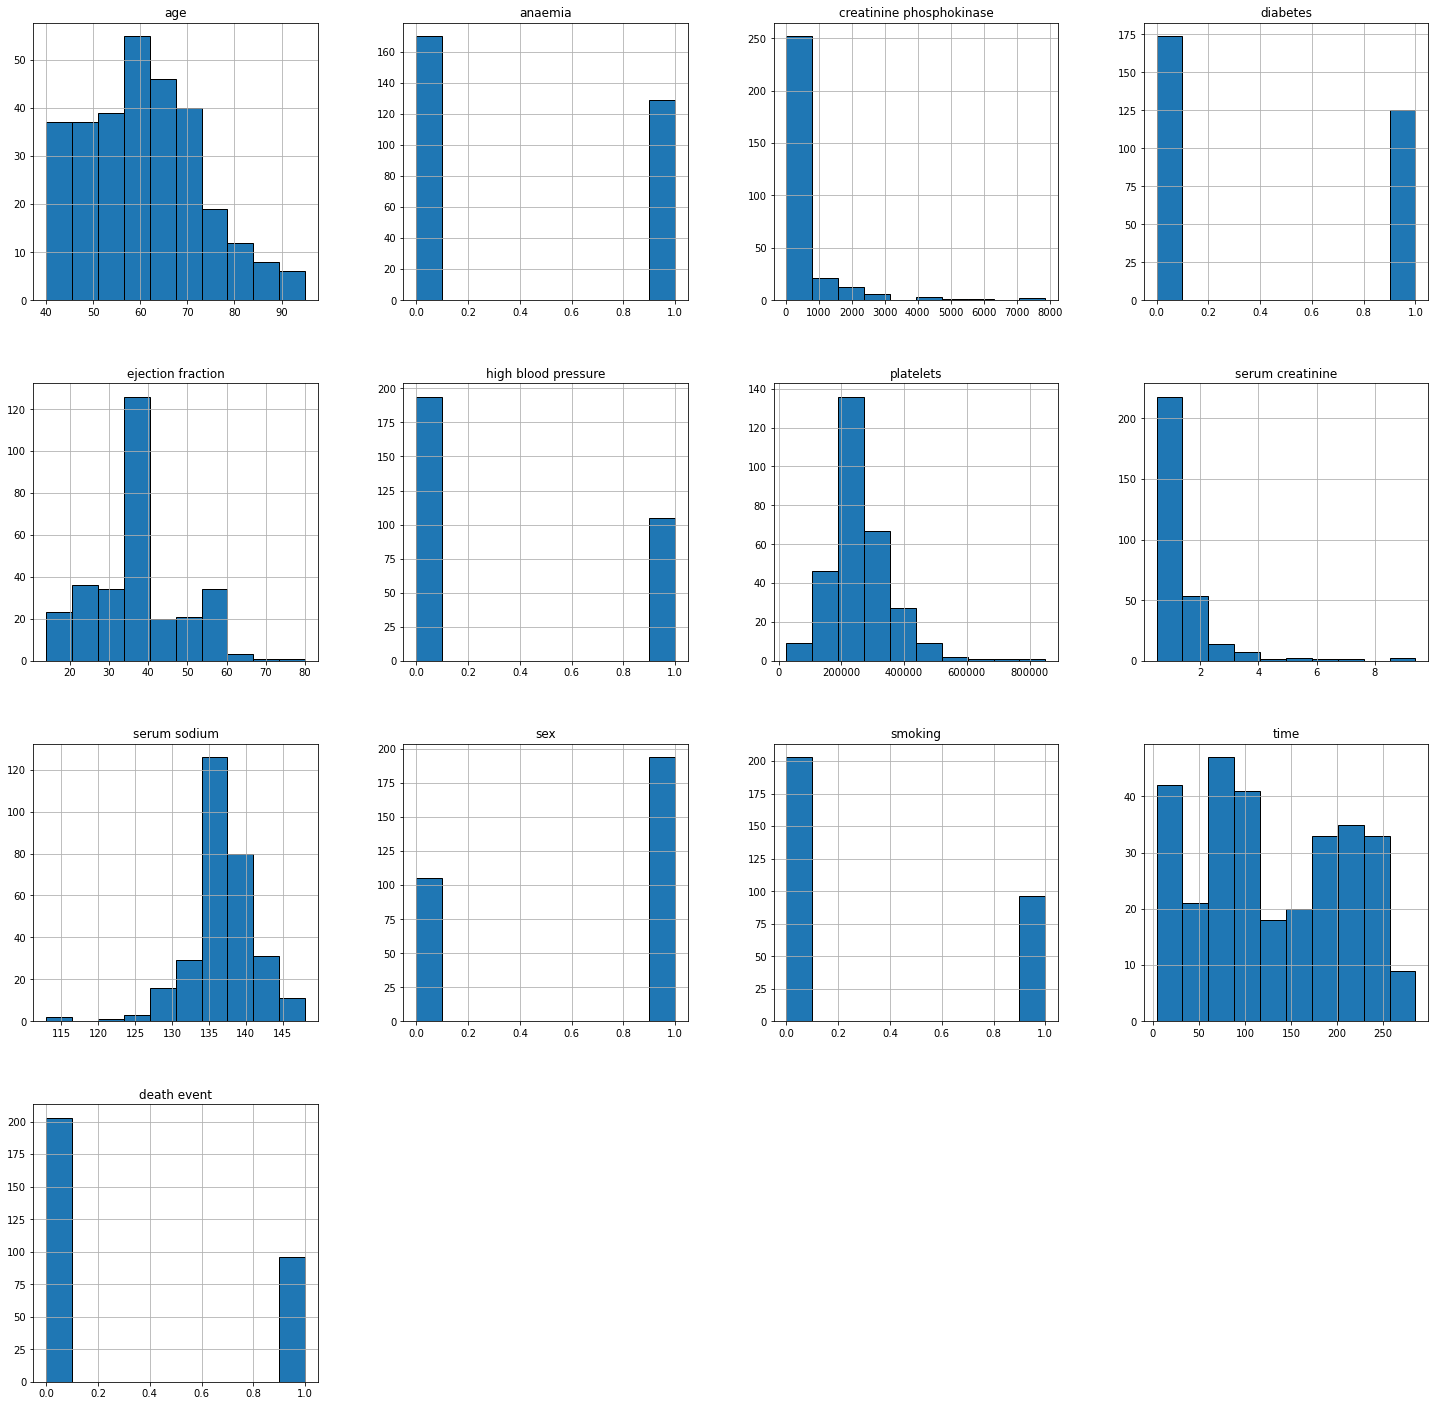

In [9]:
# Visualization of all attributes
data.hist(figsize=(25,25),edgecolor='black')

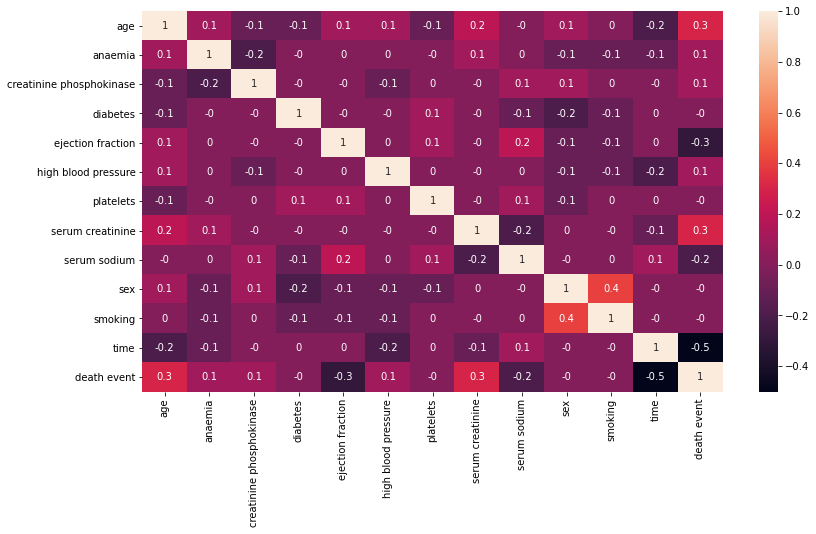

Model feature importances
[0.09956406 0.02330685 0.07652658 0.03017974 0.13788242 0.02477944
 0.06833585 0.11580423 0.08639536 0.02704552 0.02717041 0.28300952]


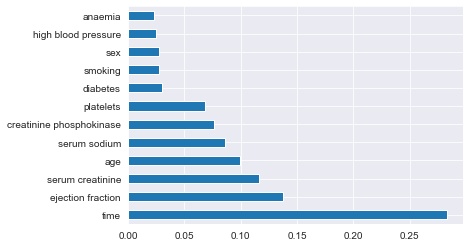

We select the 4 highest correlating features (time, ejection fraction, serum creatine and age) for the analysis.


In [10]:
# Correlation matrix - computing the pair wise correlation for all columns  
correlation_matrix = data.corr().round(1)
#print(correlation_matrix)

# Using the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
fig2 = plt.figure(figsize=(13,7))
sns.heatmap(data=correlation_matrix, annot=True)
fig2.savefig("correlation_matrix.jpg", dpi=150)
plt.show()

# Feature Selection

sns.set_style("darkgrid")
x = data.iloc[:, :-1]
y = data.iloc[:,-1]

model = ExtraTreesClassifier()
model.fit(x,y)
print('Model feature importances')
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

print('We select the 4 highest correlating features (time, ejection fraction, serum creatine and age) for the analysis.')

In [14]:
X_selected = data[['age', 'ejection fraction', 'serum creatinine','time']]


# Splitting the data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X_selected,death,random_state=0)
# the selected features are what we use to predict
# death is what we want to predict

#print(X_train.shape)
#print(X_test.shape)

# Logistic Regression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression before scaling: {:.3f}".format(logreg.score(X_test,y_test)))

#Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg.fit(X_train_scaled, y_train)
print("Test set accuracy Logistic Regression with scaled data: {:.3f}".format(logreg.score(X_test_scaled,y_test)))

Test set accuracy with Logistic Regression before scaling: 0.800
Test set accuracy Logistic Regression with scaled data: 0.787


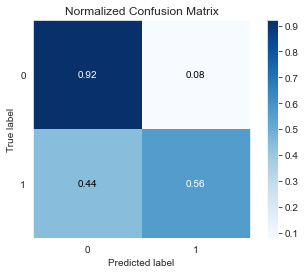

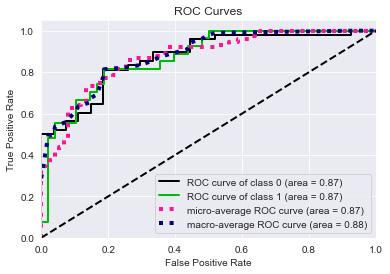

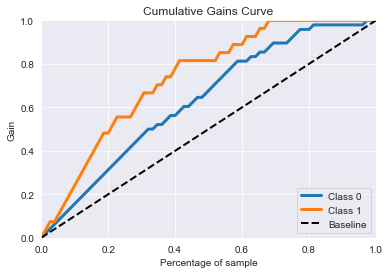

In [15]:
y_pred = logreg.predict(X_test_scaled)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
y_probas = logreg.predict_proba(X_test_scaled)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

Compraring the different models

In [16]:
# Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

death_predistions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train,death_predistions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

# Decission tree

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

death_predistions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train,death_predistions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

# OVERFITTING!

0.3534077466759757
0.0


the lower the std the better

In [17]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Better Evaluation Using Cross-Validation

# Decision tree
tree_scores = cross_val_score(tree_reg, X_train, y_train, scoring ="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
print("Decision Trees")
display_scores(tree_rmse_scores)
print("")

# Linear Regression
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring ="neg_mean_squared_error",cv=10)
lin_scores = np.sqrt(-lin_scores)
print("Linear regression")
display_scores(lin_scores)
print("")

# Random Forest Classifier
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,y_train)
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring ="neg_mean_squared_error",cv=10)
forest_scores = np.sqrt(-forest_scores)
print("Random forests")
display_scores(forest_scores)
print("")

# Logistic regression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
log_scores = cross_val_score(logreg, X_train, y_train, scoring ="neg_mean_squared_error",cv=10)
log_scores = np.sqrt(-log_scores)
print("Logistic Regression")
display_scores(log_scores)
print("")

# Support vector machines
svc_reg = SVC()
svc_reg.fit(X_train,y_train)
svc_reg_scores = cross_val_score(svc_reg, X_train, y_train, scoring ="neg_mean_squared_error",cv=10)
svc_reg_scores = np.sqrt(-svc_reg_scores)
print("Support vector machines")
display_scores(svc_reg_scores)
print("")

Decision Trees
Scores: [0.41702883 0.58976782 0.41702883 0.4662524  0.47673129 0.36927447
 0.52223297 0.63960215 0.47673129 0.47673129]
Mean: 0.48513813587083565
Standard deviation: 0.07710601111364546

Linear regression
Scores: [0.30342555 0.39943389 0.33153189 0.32128021 0.35984989 0.32134104
 0.38818904 0.45418781 0.3759105  0.3318507 ]
Mean: 0.3587000530559633
Standard deviation: 0.04387993588147765

Random forests
Scores: [0.31666743 0.43573027 0.31368081 0.29281987 0.39851429 0.33038545
 0.32430345 0.47266652 0.39881643 0.3308048 ]
Mean: 0.3614389324048501
Standard deviation: 0.057391768905389606

Logistic Regression
Scores: [0.36115756 0.29488391 0.41702883 0.36115756 0.36927447 0.30151134
 0.42640143 0.47673129 0.42640143 0.36927447]
Mean: 0.3803822309437557
Standard deviation: 0.05420163171229282

Support vector machines
Scores: [0.36115756 0.4662524  0.29488391 0.20851441 0.42640143 0.36927447
 0.47673129 0.47673129 0.42640143 0.36927447]
Mean: 0.3875622690288364
Standard dev

Another way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will
have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.
Scikit-Learn provides a function to compute the ROC AUC.

In [18]:
def plot_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    
# Linear regression

y_score_lin = cross_val_predict(lin_reg, X_train, y_train)
fpr_lin, tpr_lin, threshold_lin = roc_curve(y_train, y_score_lin)

# Decision Trees
y_score_tree = cross_val_predict(tree_reg, X_train, y_train)
fpr_tree, tpr_tree , threshold_tree = roc_curve(y_train, y_score_tree)

# Random Forests
y_score_random = cross_val_predict(forest_reg, X_train, y_train)
fpr_random, tpr_random , threshold_random = roc_curve(y_train, y_score_random)

# Logistic regression
y_score_log = cross_val_predict(logreg, X_train, y_train)
fpr_log, tpr_log, threshold_log = roc_curve(y_train, y_score_log)

# Support vector machines
from sklearn.svm import SVC

svc_reg = SVC()
svc_reg.fit(X_train,y_train)

y_score_svc = cross_val_predict(svc_reg, X_train, y_train)
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_train, y_score_svc)


print('ROC-AUC Score Decision Trees: ', roc_auc_score(y_train, y_score_tree))
print('ROC-AUC Score Random Forests: ', roc_auc_score(y_train, y_score_random))
print('ROC-AUC Score Logistic Regression: ', roc_auc_score(y_train, y_score_log))
print('ROC-AUC Score Support vector machines: ', roc_auc_score(y_train, y_score_svc))
print('ROC-AUC Score Linear regession: ', roc_auc_score(y_train, y_score_lin))

ROC-AUC Score Decision Trees:  0.71164095371669
ROC-AUC Score Random Forests:  0.8710612435717624
ROC-AUC Score Logistic Regression:  0.8066853669939225
ROC-AUC Score Support vector machines:  0.774520804114072
ROC-AUC Score Linear regession:  0.8855539971949509


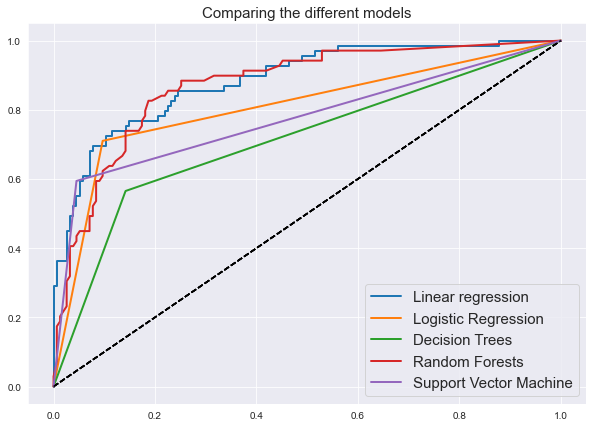

In [19]:
fig100 = plt.figure(figsize=(10,7))
plot_curve(fpr_lin, tpr_lin, label='Linear regression')
plot_curve(fpr_log, tpr_log, label='Logistic Regression')
plot_curve(fpr_tree, tpr_tree, label='Decision Trees')
plot_curve(fpr_random, tpr_random, label='Random Forests')
plot_curve(fpr_svc, tpr_svc, label='Support Vector Machine')

plt.title('Comparing the different models',fontsize=15)
plt.legend(fontsize=15)
fig100.savefig("ROC-curves.jpg", dpi=150)
plt.show()

Artificial Neural Network (ANN) - scikit-learn implementation

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_selected,death,random_state=0)
eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)
n_hidden_neurons = 50

epochs = 1000

# store models for later use
DNN_scikit = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)

for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        dnn = MLPClassifier(hidden_layer_sizes=(n_hidden_neurons), activation='logistic',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs)
        dnn.fit(X_train, y_train)
        
        DNN_scikit[i][j] = dnn
        
        print("Learning rate  = ", eta)
        print("Lambda = ", lmbd)
        print("Accuracy score on test set: ", dnn.score(X_test, y_test))
        print()

C:\Users\jessi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  1e-05
Accuracy score on test set:  0.6666666666666666

Learning rate  =  1e-05
Lambda =  0.0001
Accuracy score on test set:  0.64

Learning rate  =  1e-05
Lambda =  0.001
Accuracy score on test set:  0.64



C:\Users\jessi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  0.01
Accuracy score on test set:  0.36

Learning rate  =  1e-05
Lambda =  0.1
Accuracy score on test set:  0.64

Learning rate  =  1e-05
Lambda =  1.0
Accuracy score on test set:  0.64



C:\Users\jessi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  10.0
Accuracy score on test set:  0.76

Learning rate  =  0.0001
Lambda =  1e-05
Accuracy score on test set:  0.8266666666666667

Learning rate  =  0.0001
Lambda =  0.0001
Accuracy score on test set:  0.8266666666666667

Learning rate  =  0.0001
Lambda =  0.001
Accuracy score on test set:  0.8266666666666667

Learning rate  =  0.0001
Lambda =  0.01
Accuracy score on test set:  0.8266666666666667

Learning rate  =  0.0001
Lambda =  0.1
Accuracy score on test set:  0.8266666666666667

Learning rate  =  0.0001
Lambda =  1.0
Accuracy score on test set:  0.8266666666666667

Learning rate  =  0.0001
Lambda =  10.0
Accuracy score on test set:  0.8266666666666667

Learning rate  =  0.001
Lambda =  1e-05
Accuracy score on test set:  0.84

Learning rate  =  0.001
Lambda =  0.0001
Accuracy score on test set:  0.8266666666666667

Learning rate  =  0.001
Lambda =  0.001
Accuracy score on test set:  0.84

Learning rate  =  0.001
Lambda =  0.01
Accuracy score on test

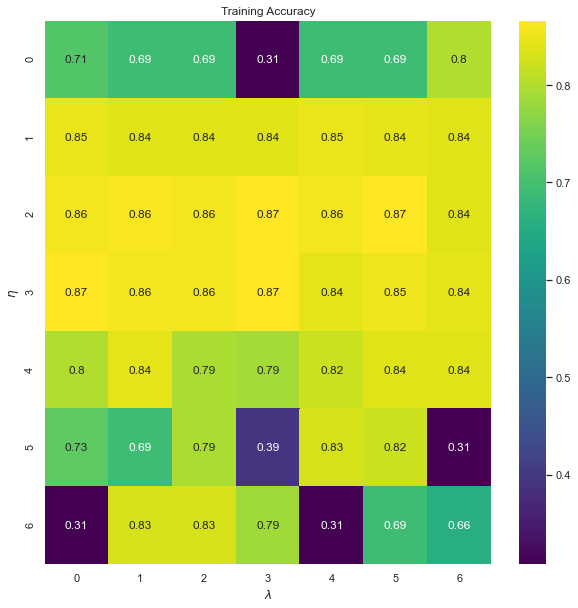

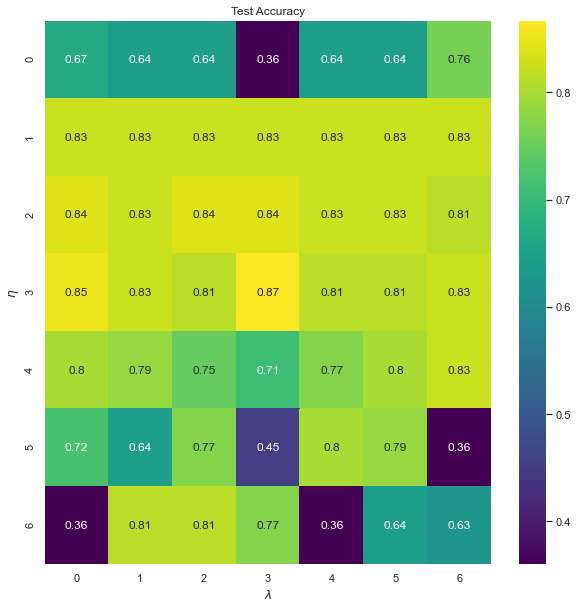

In [26]:
sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        dnn = DNN_scikit[i][j]
        
        train_pred = dnn.predict(X_train) 
        test_pred = dnn.predict(X_test)

        train_accuracy[i][j] = accuracy_score(y_train, train_pred)
        test_accuracy[i][j] = accuracy_score(y_test, test_pred)

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

Constructing a neural network in Tensorflow, using NN by keras

Epoch 1/100
3/3 [==============================] - 0s 0s/step - loss: 0.7152 - accuracy: 0.6885
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7152 - accuracy: 0.6872
Epoch 3/100
3/3 [==============================] - 0s 0s/step - loss: 0.7152 - accuracy: 0.6835
Epoch 4/100
3/3 [==============================] - 0s 0s/step - loss: 0.7151 - accuracy: 0.6672
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7151 - accuracy: 0.6835
Epoch 6/100
3/3 [==============================] - 0s 0s/step - loss: 0.7151 - accuracy: 0.6872
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7150 - accuracy: 0.6960
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7150 - accuracy: 0.6960
Epoch 9/100
3/3 [==============================] - 0s 0s/step - loss: 0.7150 - accuracy: 0.6910
Epoch 10/100
3/3 [==============================] - 0s 0s/step - loss: 0.7150 - accuracy: 0.6997
Epoch 11/100
3/3 [=================

3/3 [==============================] - 0s 0s/step - loss: 0.7133 - accuracy: 0.6872
Epoch 86/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7134 - accuracy: 0.6835
Epoch 87/100
3/3 [==============================] - 0s 0s/step - loss: 0.7134 - accuracy: 0.6785
Epoch 88/100
3/3 [==============================] - 0s 0s/step - loss: 0.7133 - accuracy: 0.6810
Epoch 89/100
3/3 [==============================] - 0s 0s/step - loss: 0.7131 - accuracy: 0.7035
Epoch 90/100
3/3 [==============================] - 0s 6ms/step - loss: 0.7132 - accuracy: 0.6885
Epoch 91/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7132 - accuracy: 0.6922
Epoch 92/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7131 - accuracy: 0.6972
Epoch 93/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7131 - accuracy: 0.6947
Epoch 94/100
3/3 [==============================] - 0s 0s/step - loss: 0.7130 - accuracy: 0.6972
Epoch 95/100
3/3 [====================

3/3 [==============================] - 0s 4ms/step - loss: 0.7210 - accuracy: 0.6797
Epoch 66/100
3/3 [==============================] - 0s 5ms/step - loss: 0.7192 - accuracy: 0.7022
Epoch 67/100
3/3 [==============================] - 0s 0s/step - loss: 0.7197 - accuracy: 0.6922
Epoch 68/100
3/3 [==============================] - ETA: 0s - loss: 0.7249 - accuracy: 0.62 - 0s 0s/step - loss: 0.7210 - accuracy: 0.6722
Epoch 69/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7190 - accuracy: 0.6972
Epoch 70/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7191 - accuracy: 0.6935
Epoch 71/100
3/3 [==============================] - 0s 0s/step - loss: 0.7181 - accuracy: 0.7035
Epoch 72/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7194 - accuracy: 0.6847
Epoch 73/100
3/3 [==============================] - 0s 0s/step - loss: 0.7187 - accuracy: 0.6910
Epoch 74/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7191 - accuracy: 0.

3/3 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.6985
Epoch 46/100
3/3 [==============================] - 0s 0s/step - loss: 0.6458 - accuracy: 0.7097
Epoch 47/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.6885
Epoch 48/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6548 - accuracy: 0.6835
Epoch 49/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6483 - accuracy: 0.6985
Epoch 50/100
3/3 [==============================] - 0s 0s/step - loss: 0.6532 - accuracy: 0.6847
Epoch 51/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6496 - accuracy: 0.6922
Epoch 52/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6568 - accuracy: 0.6735
Epoch 53/100
3/3 [==============================] - 0s 0s/step - loss: 0.6521 - accuracy: 0.6835
Epoch 54/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6462 - accuracy: 0.6960
Epoch 55/100
3/3 [==================

3/3 [==============================] - 0s 4ms/step - loss: 7.1709 - accuracy: 0.6860
Epoch 26/100
3/3 [==============================] - 0s 4ms/step - loss: 6.8751 - accuracy: 0.6885
Epoch 27/100
3/3 [==============================] - 0s 0s/step - loss: 6.5960 - accuracy: 0.6935
Epoch 28/100
3/3 [==============================] - 0s 503us/step - loss: 6.3020 - accuracy: 0.6985
Epoch 29/100
3/3 [==============================] - 0s 0s/step - loss: 6.0346 - accuracy: 0.7110
Epoch 30/100
3/3 [==============================] - 0s 4ms/step - loss: 6.2308 - accuracy: 0.6847
Epoch 31/100
3/3 [==============================] - 0s 4ms/step - loss: 6.0790 - accuracy: 0.6922
Epoch 32/100
3/3 [==============================] - 0s 0s/step - loss: 5.7403 - accuracy: 0.6997
Epoch 33/100
3/3 [==============================] - 0s 4ms/step - loss: 5.6917 - accuracy: 0.6935
Epoch 34/100
3/3 [==============================] - 0s 0s/step - loss: 5.5091 - accuracy: 0.6960
Epoch 35/100
3/3 [=================

3/3 [==============================] - 0s 0s/step - loss: 1.0780 - accuracy: 0.8387
Epoch 6/100
3/3 [==============================] - 0s 0s/step - loss: 0.9931 - accuracy: 0.8491
Epoch 7/100
3/3 [==============================] - 0s 0s/step - loss: 1.0210 - accuracy: 0.8444
Epoch 8/100
3/3 [==============================] - 0s 0s/step - loss: 1.0178 - accuracy: 0.8469
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0136 - accuracy: 0.8369
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0143 - accuracy: 0.8321
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9220 - accuracy: 0.8466
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0692 - accuracy: 0.8411
Epoch 13/100
3/3 [==============================] - 0s 0s/step - loss: 0.8868 - accuracy: 0.8416
Epoch 14/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8699 - accuracy: 0.8479
Epoch 15/100
3/3 [========================

3/3 [==============================] - 0s 0s/step - loss: 0.4711 - accuracy: 0.8316
Epoch 90/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4586 - accuracy: 0.8546
Epoch 91/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4591 - accuracy: 0.8476
Epoch 92/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4517 - accuracy: 0.8633
Epoch 93/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4467 - accuracy: 0.8636
Epoch 94/100
3/3 [==============================] - 0s 0s/step - loss: 0.4480 - accuracy: 0.8596
Epoch 95/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4392 - accuracy: 0.8646
Epoch 96/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4441 - accuracy: 0.8630
Epoch 97/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4369 - accuracy: 0.8588
Epoch 98/100
3/3 [==============================] - 0s 0s/step - loss: 0.4348 - accuracy: 0.8571
Epoch 99/100
3/3 [==================

3/3 [==============================] - 0s 4ms/step - loss: 0.7131 - accuracy: 0.6972
Epoch 70/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7102 - accuracy: 0.7022
Epoch 71/100
3/3 [==============================] - 0s 0s/step - loss: 0.7130 - accuracy: 0.6960
Epoch 72/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7164 - accuracy: 0.6885
Epoch 73/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7141 - accuracy: 0.6922
Epoch 74/100
3/3 [==============================] - 0s 0s/step - loss: 0.7118 - accuracy: 0.6960
Epoch 75/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7133 - accuracy: 0.6922
Epoch 76/100
3/3 [==============================] - 0s 0s/step - loss: 0.7128 - accuracy: 0.6922
Epoch 77/100
3/3 [==============================] - 0s 0s/step - loss: 0.7066 - accuracy: 0.7035
Epoch 78/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7128 - accuracy: 0.6910
Epoch 79/100
3/3 [===================

3/3 [==============================] - 0s 4ms/step - loss: 0.9054 - accuracy: 0.7863
Epoch 50/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8649 - accuracy: 0.7996
Epoch 51/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9233 - accuracy: 0.7866
Epoch 52/100
3/3 [==============================] - 0s 0s/step - loss: 0.8656 - accuracy: 0.7951
Epoch 53/100
3/3 [==============================] - 0s 0s/step - loss: 0.8929 - accuracy: 0.8047
Epoch 54/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8920 - accuracy: 0.8120
Epoch 55/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8644 - accuracy: 0.8037
Epoch 56/100
3/3 [==============================] - 0s 0s/step - loss: 0.8744 - accuracy: 0.8207
Epoch 57/100
3/3 [==============================] - 0s 0s/step - loss: 0.8674 - accuracy: 0.8075
Epoch 58/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8661 - accuracy: 0.8160
Epoch 59/100
3/3 [===================

3/3 [==============================] - 0s 4ms/step - loss: 0.7509 - accuracy: 0.8678
Epoch 30/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7834 - accuracy: 0.8571
Epoch 31/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8586 - accuracy: 0.8531
Epoch 32/100
3/3 [==============================] - 0s 0s/step - loss: 0.7733 - accuracy: 0.8518
Epoch 33/100
3/3 [==============================] - 0s 2ms/step - loss: 0.7892 - accuracy: 0.8413
Epoch 34/100
3/3 [==============================] - 0s 4ms/step - loss: 0.9066 - accuracy: 0.8349
Epoch 35/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7565 - accuracy: 0.8518
Epoch 36/100
3/3 [==============================] - 0s 0s/step - loss: 1.2322 - accuracy: 0.6652
Epoch 37/100
3/3 [==============================] - 0s 4ms/step - loss: 0.7253 - accuracy: 0.8748
Epoch 38/100
3/3 [==============================] - 0s 0s/step - loss: 2.3515 - accuracy: 0.5994
Epoch 39/100
3/3 [==================

3/3 [==============================] - 0s 0s/step - loss: 0.7047 - accuracy: 0.8494
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.8196
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6749 - accuracy: 0.8371
Epoch 12/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.8496
Epoch 13/100
3/3 [==============================] - 0s 0s/step - loss: 0.7548 - accuracy: 0.8312
Epoch 14/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6858 - accuracy: 0.8506
Epoch 15/100
3/3 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.8404
Epoch 16/100
3/3 [==============================] - 0s 0s/step - loss: 0.6379 - accuracy: 0.8419
Epoch 17/100
3/3 [==============================] - 0s 0s/step - loss: 0.6193 - accuracy: 0.8641
Epoch 18/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6645 - accuracy: 0.8506
Epoch 19/100
3/3 [===================

3/3 [==============================] - 0s 0s/step - loss: 0.6206 - accuracy: 0.8324
Epoch 94/100
3/3 [==============================] - 0s 0s/step - loss: 0.5995 - accuracy: 0.8379
Epoch 95/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6773 - accuracy: 0.8153
Epoch 96/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5915 - accuracy: 0.8588
Epoch 97/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6040 - accuracy: 0.8419
Epoch 98/100
3/3 [==============================] - 0s 0s/step - loss: 0.5804 - accuracy: 0.8591
Epoch 99/100
3/3 [==============================] - 0s 0s/step - loss: 0.6365 - accuracy: 0.8511
Epoch 100/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6980 - accuracy: 0.8000
Epoch 1/100
3/3 [==============================] - 0s 4ms/step - loss: 2.0460 - accuracy: 0.6682
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 2.0300 - accuracy: 0.6991
Epoch 3/100
3/3 [=====================

3/3 [==============================] - 0s 0s/step - loss: 1.4592 - accuracy: 0.8222
Epoch 74/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4684 - accuracy: 0.8282
Epoch 75/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4939 - accuracy: 0.8072
Epoch 76/100
3/3 [==============================] - 0s 0s/step - loss: 1.4861 - accuracy: 0.8157
Epoch 77/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4670 - accuracy: 0.8279
Epoch 78/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4968 - accuracy: 0.8195
Epoch 79/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5072 - accuracy: 0.7913
Epoch 80/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4358 - accuracy: 0.8297
Epoch 81/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4716 - accuracy: 0.8254
Epoch 82/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4829 - accuracy: 0.8170
Epoch 83/100
3/3 [=================

3/3 [==============================] - 0s 0s/step - loss: 1.5068 - accuracy: 0.8476
Epoch 54/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4757 - accuracy: 0.8352
Epoch 55/100
3/3 [==============================] - 0s 4ms/step - loss: 1.7556 - accuracy: 0.8179
Epoch 56/100
3/3 [==============================] - 0s 0s/step - loss: 1.7628 - accuracy: 0.7958
Epoch 57/100
3/3 [==============================] - 0s 4ms/step - loss: 1.6420 - accuracy: 0.8296
Epoch 58/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4693 - accuracy: 0.8463
Epoch 59/100
3/3 [==============================] - 0s 4ms/step - loss: 1.7506 - accuracy: 0.7320
Epoch 60/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4268 - accuracy: 0.8429
Epoch 61/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4500 - accuracy: 0.8529
Epoch 62/100
3/3 [==============================] - 0s 0s/step - loss: 1.4371 - accuracy: 0.8471
Epoch 63/100
3/3 [==================

3/3 [==============================] - 0s 4ms/step - loss: 1.3741 - accuracy: 0.8576
Epoch 34/100
3/3 [==============================] - 0s 0s/step - loss: 1.4140 - accuracy: 0.8554
Epoch 35/100
3/3 [==============================] - 0s 0s/step - loss: 1.3955 - accuracy: 0.8299
Epoch 36/100
3/3 [==============================] - 0s 4ms/step - loss: 1.3921 - accuracy: 0.8568
Epoch 37/100
3/3 [==============================] - 0s 4ms/step - loss: 1.4300 - accuracy: 0.8416
Epoch 38/100
3/3 [==============================] - 0s 0s/step - loss: 1.3865 - accuracy: 0.8424
Epoch 39/100
3/3 [==============================] - 0s 4ms/step - loss: 1.3854 - accuracy: 0.8588
Epoch 40/100
3/3 [==============================] - 0s 4ms/step - loss: 1.3852 - accuracy: 0.8586
Epoch 41/100
3/3 [==============================] - 0s 0s/step - loss: 1.3921 - accuracy: 0.8483
Epoch 42/100
3/3 [==============================] - 0s 4ms/step - loss: 1.3909 - accuracy: 0.8448
Epoch 43/100
3/3 [===================

<ipython-input-32-33376a827934>:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+x)
<ipython-input-32-33376a827934>:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+y)


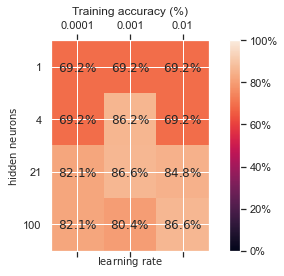

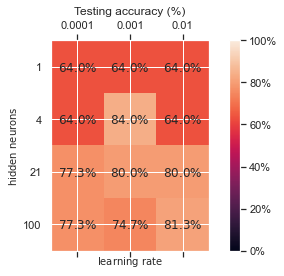

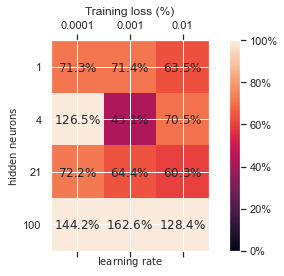

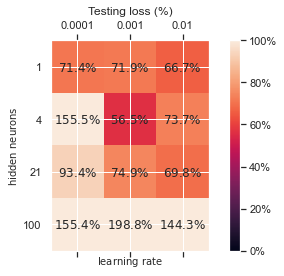

In [32]:


y_train=to_categorical(y_train)     #Convert labels to categorical when using categorical cross entropy
y_test=to_categorical(y_test)

# %%

# Define tunable parameters"

eta=np.logspace(-4,-2,3)                    #Define vector of learning rates (parameter to SGD optimiser)
lamda=0.01                                  #Define hyperparameter
n_layers=2                                  #Define number of hidden layers in the model
n_neuron=np.logspace(0,2,4,dtype=int)       #Define number of neurons per layer
epochs=100                                #Number of reiterations over the input data
batch_size=100                            #Number of samples per gradient update

# %%

"""Define function to return Deep Neural Network model"""

def NN_model(inputsize,n_layers,n_neuron,eta,lamda):
    model=Sequential()      
    for i in range(n_layers):       #Run loop to add hidden layers to the model
        if (i==0):                  #First layer requires input dimensions
            model.add(Dense(n_neuron,activation='relu',kernel_regularizer=regularizers.l2(lamda),input_dim=inputsize))
        else:                       #Subsequent layers are capable of automatic shape inferencing
            model.add(Dense(n_neuron,activation='relu',kernel_regularizer=regularizers.l2(lamda)))
    model.add(Dense(2,activation='softmax'))  #2 outputs - ordered and disordered (softmax for prob)
    sgd=optimizers.SGD(lr=eta)
    model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
    return model

    
Train_accuracy=np.zeros((len(n_neuron),len(eta)))      #Define matrices to store accuracy scores as a function
Test_accuracy=np.zeros((len(n_neuron),len(eta)))       #of learning rate and number of hidden neurons for 
Test_loss=np.zeros((len(n_neuron),len(eta)))  
Train_loss=np.zeros((len(n_neuron),len(eta)))  

for i in range(len(n_neuron)):     #run loops over hidden neurons and learning rates to calculate 
    for j in range(len(eta)):      #accuracy scores 
        DNN_model=NN_model(X_train.shape[1],n_layers,n_neuron[i],eta[j],lamda)
        DNN_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)
        Train_accuracy[i,j]=DNN_model.evaluate(X_train,y_train)[1]
        Test_accuracy[i,j]=DNN_model.evaluate(X_test,y_test)[1]
        Train_loss[i,j]=DNN_model.evaluate(X_train,y_train)[0]
        Test_loss[i,j]=DNN_model.evaluate(X_test,y_test)[0]
               

def plot_data(x,y,data,title=None):

    # plot results
    fontsize=10


    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=1)
    
    cbar=fig.colorbar(cax)
    cbar.set_ticks([0,.2,.4,0.6,0.8,1.0])
    cbar.set_ticklabels(['0%','20%','40%','60%','80%','100%'])

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.1f}\\%$".format( 100*data[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center')

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str(i) for i in y]


    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(['']+y)

    ax.set_xlabel('$\\mathrm{learning\\ rate}$',fontsize=fontsize)
    ax.set_ylabel('$\\mathrm{hidden\\ neurons}$',fontsize=fontsize)
    if title is not None:
        ax.set_title(title)

    plt.tight_layout()

    plt.show() 
plot_data(eta,n_neuron,Train_accuracy, 'Training accuracy (%)')
plot_data(eta,n_neuron,Test_accuracy, 'Testing accuracy (%)')
plot_data(eta,n_neuron,Train_loss, 'Training loss (%)')
plot_data(eta,n_neuron,Test_loss, 'Testing loss (%)')